# Search: Solving a Maze Using a Goal-based Agent

Student Name: [Ritik Khandelwal]

I have used the following AI tools:

I understand that my submission needs to be my own work: [RK]

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible.

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd "/content/drive/My Drive/"
import maze_helper

/content/drive/My Drive


In [6]:
with open(f"small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`.

In [9]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

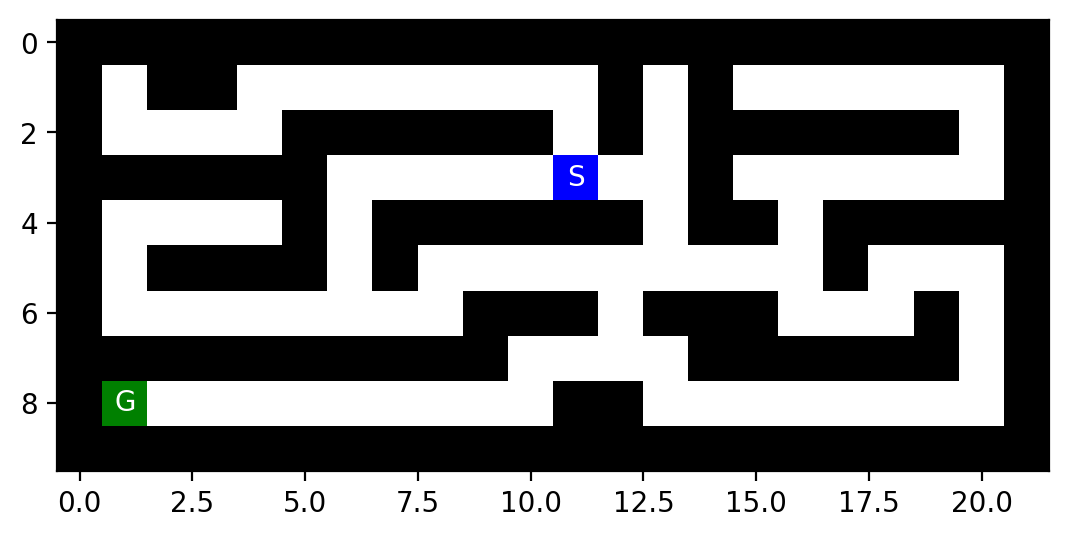

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [ ]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [ ]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    /content/drive/My Drive/maze_helper.py




## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [4]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"

    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]

        while not node.parent is None:
            node = node.parent
            path.append(node)

        path.reverse()

        return(path)

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../HOWTOs/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the
    - [small maze](small_maze.txt),
    - [medium maze](medium_maze.txt),
    - [large maze](large_maze.txt),
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate.

*Note:* You can swich the next block from code to Markdown and use formating.

In [ ]:
# Your answer goes here
# Initial State- The initial state is the starting location/position of the maze, denoted by 'StartCoord' variable.
# Actions - All the possible movements/actions for any agent in a given environment. In this, actions are denoted as following:    actions = {"north":(-1,0),"south":(1,0),"east":(0,1),"west":(0,-1)}
# Transition Model - It is defined as the new position after an action is taken. In this scenario, it is the variable frontier that stores the node with the new position.
# Goal State - It is considered as the final location/position of the maze, denoted by 'GoalCoord' variable.
# Path cost - It is the cost of agent to transition to the new position.

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determin these values for a given maze.

In [ ]:
# State Space Size- For a given maze, It would be determined by the size of the maze.
# depth of the optimal solution - It would be determine by the depth exploration of the optimal solution
# Maximum depth of tree - It would be determine by the depth of exploration that the search algorithm will reach.
# Maximum Branching Factor- determine by the maximum number of child nodes a node can have in the search tree.

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore.
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [53]:
data_whole = []

class Node:

    def __init__(self, pos, parent = None, action = None, cost=0, goal = None):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search
        self.goal = goal

        if goal:
         def heuristic(node_position, goal_position):
                return abs(node_position[0]-goal_position[0]) + abs(node_position[1]-goal_position[1])
         self.distance = heuristic(pos,goal)


    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"

    def __lt__(self, other_dist):
        return self.distance < other_dist.distance

    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]

        while not node.parent is None:
            node = node.parent
            path.append(node)

        path.reverse()

        return(path)

In [54]:
#BFS


def bfs(maze, start, goal, root):
    frontier_queue = [root]
    explored = set()


    s_size = 1
    max_Branching_Factor = 0
    max_tree_depth = 0
    max_frontier_size = len(frontier_queue)

    while frontier_queue:
        if len(frontier_queue) > max_frontier_size:
            max_frontier_size = len(frontier_queue)


        current_node = frontier_queue.pop(0)
        current_position = current_node.pos

        cost = current_node.cost

        if cost > max_tree_depth:
            max_tree_depth = cost

        if current_position == goal:
            optimal_depth = current_node.cost
            return current_node,s_size,max_Branching_Factor,optimal_depth, max_tree_depth    # Only return the solution node

        explored.add(current_position)


        actions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        branch_fact = 0
        for act in actions:

            new_pos = (current_position[0] + act[0], current_position[1] + act[1])

            if mh.look(maze, new_pos) != "X" and new_pos not in explored:
                childNode = Node(new_pos, current_node, act, current_node.cost + 1)
                if current_position != start and current_position != goal and childNode.pos != goal:
                    maze[new_pos[0]][new_pos[1]] = "F"
                    maze[current_position[0]][current_position[1]] = "."
                branch_fact+=1
                frontier_queue.append(childNode)
                s_size += 1

                if branch_fact > max_Branching_Factor:
                  max_Branching_Factor = branch_fact

        # mh.show_maze(maze)
    return None  # No solution found


Path from start to goal:
(3, 11)
(3, 12)
(3, 13)
(4, 13)
(5, 13)
(5, 12)
(6, 12)
(7, 12)
(7, 11)
(7, 10)
(8, 10)
(8, 9)
(8, 8)
(8, 7)
(8, 6)
(8, 5)
(8, 4)
(8, 3)
(8, 2)
(8, 1)
Cost: 19
state_size: 96


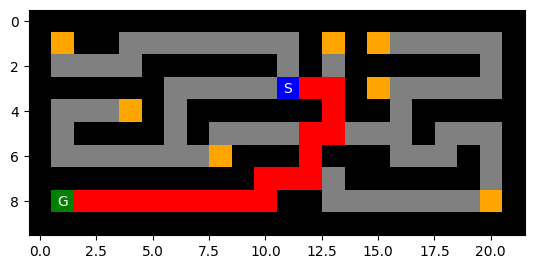

Path from start to goal:
(1, 34)
(1, 33)
(1, 32)
(1, 31)
(1, 30)
(1, 29)
(1, 28)
(1, 27)
(1, 26)
(1, 25)
(2, 25)
(3, 25)
(3, 26)
(3, 27)
(4, 27)
(5, 27)
(6, 27)
(6, 26)
(6, 25)
(6, 24)
(5, 24)
(5, 23)
(5, 22)
(5, 21)
(5, 20)
(6, 20)
(7, 20)
(8, 20)
(8, 21)
(8, 22)
(8, 23)
(8, 24)
(8, 25)
(8, 26)
(8, 27)
(9, 27)
(10, 27)
(11, 27)
(12, 27)
(13, 27)
(14, 27)
(15, 27)
(15, 26)
(15, 25)
(15, 24)
(15, 23)
(15, 22)
(15, 21)
(15, 20)
(15, 19)
(15, 18)
(15, 17)
(15, 16)
(15, 15)
(15, 14)
(15, 13)
(15, 12)
(15, 11)
(15, 10)
(16, 10)
(16, 9)
(16, 8)
(16, 7)
(16, 6)
(16, 5)
(16, 4)
(16, 3)
(16, 2)
(16, 1)
Cost: 68
state_size: 278


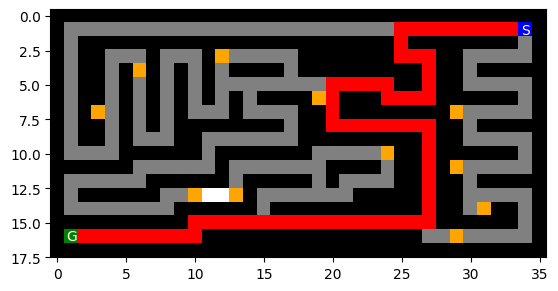

Path from start to goal:
(35, 35)
(34, 35)
(33, 35)
(33, 34)
(33, 33)
(33, 32)
(33, 31)
(32, 31)
(31, 31)
(31, 30)
(31, 29)
(32, 29)
(33, 29)
(33, 28)
(33, 27)
(33, 26)
(33, 25)
(33, 24)
(33, 23)
(33, 22)
(33, 21)
(33, 20)
(33, 19)
(33, 18)
(33, 17)
(33, 16)
(33, 15)
(32, 15)
(31, 15)
(31, 16)
(31, 17)
(30, 17)
(29, 17)
(29, 16)
(29, 15)
(28, 15)
(27, 15)
(26, 15)
(25, 15)
(24, 15)
(23, 15)
(23, 16)
(23, 17)
(23, 18)
(23, 19)
(23, 20)
(23, 21)
(24, 21)
(25, 21)
(25, 22)
(25, 23)
(24, 23)
(23, 23)
(23, 24)
(23, 25)
(23, 26)
(23, 27)
(22, 27)
(21, 27)
(21, 28)
(21, 29)
(22, 29)
(23, 29)
(23, 30)
(23, 31)
(22, 31)
(21, 31)
(20, 31)
(19, 31)
(18, 31)
(17, 31)
(17, 32)
(17, 33)
(17, 34)
(17, 35)
(16, 35)
(15, 35)
(14, 35)
(13, 35)
(12, 35)
(11, 35)
(10, 35)
(9, 35)
(8, 35)
(7, 35)
(7, 34)
(7, 33)
(8, 33)
(9, 33)
(9, 32)
(9, 31)
(9, 30)
(9, 29)
(10, 29)
(11, 29)
(12, 29)
(13, 29)
(14, 29)
(15, 29)
(15, 28)
(15, 27)
(16, 27)
(17, 27)
(18, 27)
(19, 27)
(19, 26)
(19, 25)
(18, 25)
(17, 25)
(17, 

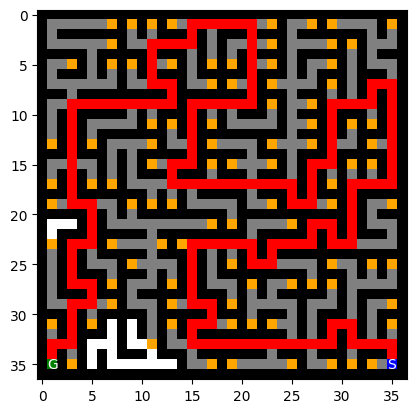

Path from start to goal:
(10, 1)
(10, 2)
(10, 3)
(10, 4)
(10, 5)
(10, 6)
(10, 7)
(10, 8)
(9, 8)
(8, 8)
(7, 8)
(6, 8)
(5, 8)
(4, 8)
(3, 8)
(2, 8)
(1, 8)
(1, 7)
(1, 6)
(1, 5)
(1, 4)
(1, 3)
(1, 2)
(1, 1)
Cost: 23
state_size: 213


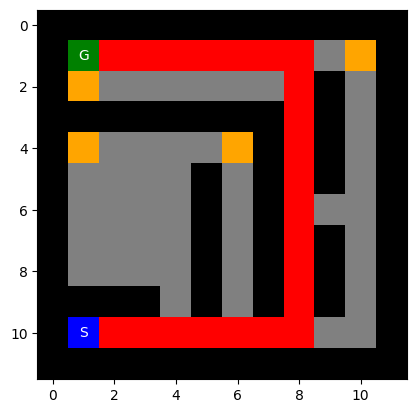

Path from start to goal:
(9, 2)
(8, 2)
(7, 2)
(6, 2)
(5, 2)
(4, 2)
(3, 2)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
Cost: 14
state_size: 1726


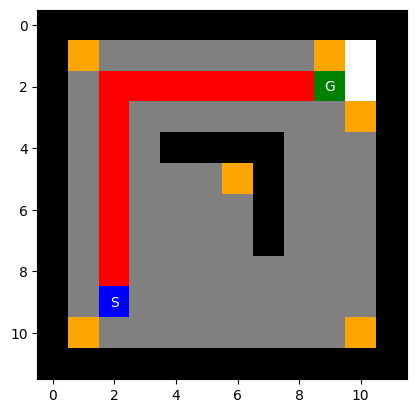

Path from start to goal:
(9, 2)
(8, 2)
(7, 2)
(6, 2)
(5, 2)
(4, 2)
(3, 2)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
Cost: 14
state_size: 22978


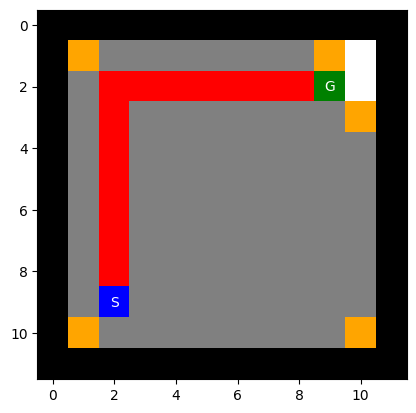

Path from start to goal:
(2, 9)
(3, 9)
(4, 9)
(5, 9)
(6, 9)
(7, 9)
(8, 9)
(9, 9)
(9, 8)
(9, 7)
(9, 6)
(9, 5)
(9, 4)
(9, 3)
(9, 2)
Cost: 14
state_size: 22978


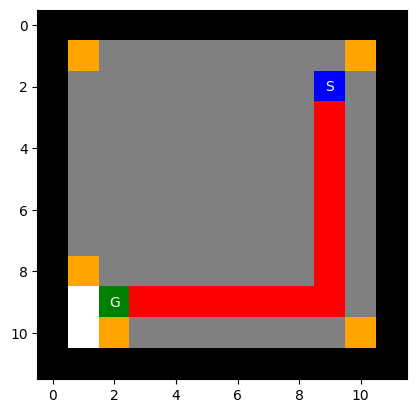

          Maze File Search_algorithm  Cost  Size of State Space Explored  \
0    small_maze.txt              BFS    19                            96   
1   medium_maze.txt              BFS    68                           278   
2    large_maze.txt              BFS   210                           623   
3    loops_maze.txt              BFS    23                           213   
4     wall_maze.txt              BFS    14                          1726   
5    empty_maze.txt              BFS    14                         22978   
6  empty_2_maze.txt              BFS    14                         22978   

   Maximum Branching Factor  Optimal Depth  Maximum Tree Depth  
0                         3             19                  19  
1                         2             68                  68  
2                         3            210                 210  
3                         2             23                  23  
4                         4             14                  14  
5

In [55]:
import pandas as pd
import maze_helper as mh


maze_files = ["small_maze.txt", "medium_maze.txt", "large_maze.txt", "loops_maze.txt", "wall_maze.txt", "empty_maze.txt", "empty_2_maze.txt"]


for maze_file in maze_files:
    # Read the maze file and parse it
    with open(maze_file, 'r') as f:
        maze_str = f.read()
        maze = mh.parse_maze(maze_str)

    # Finding the start and goal coordinates for the maze
    start_state = mh.find_pos(maze, what="S")
    goal_state = mh.find_pos(maze, what="G")

    root = Node(start_state, None, None, 0)
    solution_node, s_size, max_Branching_Factor, optimal_depth, max_tree_depth = bfs(maze, start_state, goal_state, root)

    if solution_node:
        path = solution_node.get_path_from_root()
        print("Path from start to goal:")
        for node in path:
            print(node.pos)
            if node.pos != start_state and node.pos != goal_state:
                maze[node.pos[0]][node.pos[1]] = "P"
        print("Cost:", solution_node.cost)
        print("state_size:", s_size)
    else:
        print("Goal not found")
    mh.show_maze(maze)
    data_whole.append([maze_file, "BFS",solution_node.cost, s_size, max_Branching_Factor, optimal_depth, max_tree_depth])


# Create a DataFrame
columns = ["Maze File","Search_algorithm", "Cost", "Size of State Space Explored", "Maximum Branching Factor", "Optimal Depth", "Maximum Tree Depth"]
df_whole = pd.DataFrame(data_whole, columns=columns)

print(df_whole)


In [ ]:
#my open maze for bfs is not running, as it just start and stuck into the wall. Based on my understanding why it is not running and going on infinite loop becuase i think based on the sequence of action may be, also i think my agent is just banging on to the wall.

In [56]:
#DFS

def dfs(maze, start, goal, root, depth_limit):
    frontier_stack = [root]

    s_size = 1
    max_Branching_Factor = 0
    max_tree_depth = 0
    max_frontier_size = len(frontier_stack)

    while frontier_stack:
        if len(frontier_stack) > max_frontier_size:
            max_frontier_size = len(frontier_stack)

        current_node = frontier_stack.pop()
        current_position = current_node.pos
        cost = current_node.cost

        if cost > max_tree_depth:
            max_tree_depth = cost

        if current_position == goal:
            optimal_depth = current_node.cost
            return current_node, s_size, max_Branching_Factor,optimal_depth, max_tree_depth   # Only return the solution node


        actions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        branch_fact = 0
        if cost < depth_limit:  # Apply depth limit
            for act in actions:
                new_pos = (current_position[0] + act[0], current_position[1] + act[1])

                # Checking the new position is valid or not and not forming a cycle
                if mh.look(maze, new_pos) != "X" and not any(node.pos == new_pos for node in current_node.get_path_from_root()):
                    child_node = Node(new_pos, current_node, act, current_node.cost + 1)
                    if current_position != start and current_position != goal and child_node.pos != goal:
                        maze[new_pos[0]][new_pos[1]] = "F"
                        maze[current_position[0]][current_position[1]] = "."
                    s_size += 1
                    branch_fact+=1
                    frontier_stack.append(child_node)

                    if branch_fact > max_Branching_Factor:
                      max_Branching_Factor = branch_fact

    return None

Path from start to goal:
(3, 11)
(3, 10)
(3, 9)
(3, 8)
(3, 7)
(3, 6)
(4, 6)
(5, 6)
(6, 6)
(6, 7)
(6, 8)
(5, 8)
(5, 9)
(5, 10)
(5, 11)
(5, 12)
(5, 13)
(5, 14)
(5, 15)
(5, 16)
(6, 16)
(6, 17)
(6, 18)
(5, 18)
(5, 19)
(5, 20)
(6, 20)
(7, 20)
(8, 20)
(8, 19)
(8, 18)
(8, 17)
(8, 16)
(8, 15)
(8, 14)
(8, 13)
(7, 13)
(7, 12)
(7, 11)
(7, 10)
(8, 10)
(8, 9)
(8, 8)
(8, 7)
(8, 6)
(8, 5)
(8, 4)
(8, 3)
(8, 2)
(8, 1)
Cost: 49
state_size: 79


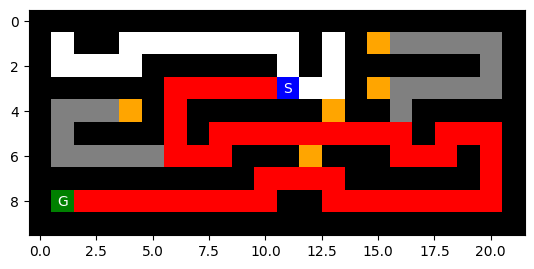

Path from start to goal:
(1, 34)
(1, 33)
(1, 32)
(1, 31)
(1, 30)
(1, 29)
(1, 28)
(1, 27)
(1, 26)
(1, 25)
(1, 24)
(1, 23)
(1, 22)
(1, 21)
(1, 20)
(1, 19)
(1, 18)
(1, 17)
(1, 16)
(1, 15)
(1, 14)
(1, 13)
(1, 12)
(1, 11)
(1, 10)
(1, 9)
(1, 8)
(1, 7)
(1, 6)
(1, 5)
(1, 4)
(1, 3)
(1, 2)
(1, 1)
(2, 1)
(3, 1)
(4, 1)
(5, 1)
(6, 1)
(7, 1)
(8, 1)
(9, 1)
(10, 1)
(10, 2)
(10, 3)
(10, 4)
(9, 4)
(8, 4)
(7, 4)
(6, 4)
(5, 4)
(4, 4)
(3, 4)
(3, 5)
(3, 6)
(4, 6)
(5, 6)
(6, 6)
(7, 6)
(8, 6)
(9, 6)
(9, 7)
(9, 8)
(8, 8)
(7, 8)
(6, 8)
(5, 8)
(4, 8)
(3, 8)
(3, 9)
(3, 10)
(4, 10)
(5, 10)
(6, 10)
(7, 10)
(7, 11)
(7, 12)
(6, 12)
(5, 12)
(5, 13)
(5, 14)
(5, 15)
(5, 16)
(5, 17)
(5, 18)
(5, 19)
(5, 20)
(6, 20)
(7, 20)
(8, 20)
(8, 21)
(8, 22)
(8, 23)
(8, 24)
(8, 25)
(8, 26)
(8, 27)
(9, 27)
(10, 27)
(11, 27)
(12, 27)
(13, 27)
(14, 27)
(15, 27)
(15, 26)
(15, 25)
(15, 24)
(15, 23)
(15, 22)
(15, 21)
(15, 20)
(15, 19)
(15, 18)
(15, 17)
(15, 16)
(15, 15)
(15, 14)
(15, 13)
(15, 12)
(15, 11)
(15, 10)
(16, 10)
(16, 9)
(16, 8)


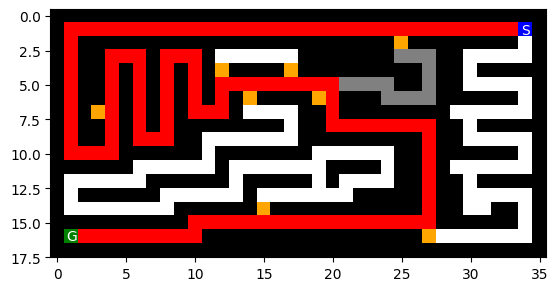

Path from start to goal:
(35, 35)
(34, 35)
(33, 35)
(33, 34)
(33, 33)
(33, 32)
(33, 31)
(32, 31)
(31, 31)
(31, 30)
(31, 29)
(32, 29)
(33, 29)
(33, 28)
(33, 27)
(33, 26)
(33, 25)
(33, 24)
(33, 23)
(33, 22)
(33, 21)
(33, 20)
(33, 19)
(33, 18)
(33, 17)
(33, 16)
(33, 15)
(32, 15)
(31, 15)
(31, 16)
(31, 17)
(30, 17)
(29, 17)
(29, 16)
(29, 15)
(28, 15)
(27, 15)
(26, 15)
(25, 15)
(24, 15)
(23, 15)
(23, 16)
(23, 17)
(23, 18)
(23, 19)
(23, 20)
(23, 21)
(24, 21)
(25, 21)
(25, 22)
(25, 23)
(24, 23)
(23, 23)
(23, 24)
(23, 25)
(23, 26)
(23, 27)
(22, 27)
(21, 27)
(21, 28)
(21, 29)
(22, 29)
(23, 29)
(23, 30)
(23, 31)
(22, 31)
(21, 31)
(20, 31)
(19, 31)
(18, 31)
(17, 31)
(17, 32)
(17, 33)
(17, 34)
(17, 35)
(16, 35)
(15, 35)
(14, 35)
(13, 35)
(12, 35)
(11, 35)
(10, 35)
(9, 35)
(8, 35)
(7, 35)
(7, 34)
(7, 33)
(8, 33)
(9, 33)
(9, 32)
(9, 31)
(9, 30)
(9, 29)
(10, 29)
(11, 29)
(12, 29)
(13, 29)
(14, 29)
(15, 29)
(15, 28)
(15, 27)
(16, 27)
(17, 27)
(18, 27)
(19, 27)
(19, 26)
(19, 25)
(18, 25)
(17, 25)
(17, 

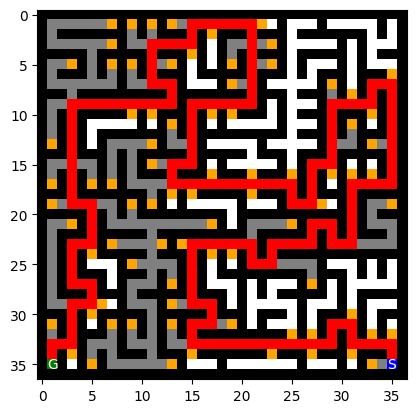

Path from start to goal:
(10, 1)
(10, 2)
(10, 3)
(10, 4)
(10, 5)
(10, 6)
(10, 7)
(10, 8)
(10, 9)
(10, 10)
(9, 10)
(8, 10)
(7, 10)
(6, 10)
(6, 9)
(6, 8)
(5, 8)
(4, 8)
(3, 8)
(2, 8)
(2, 7)
(2, 6)
(2, 5)
(2, 4)
(2, 3)
(2, 2)
(2, 1)
(1, 1)
Cost: 27
state_size: 40


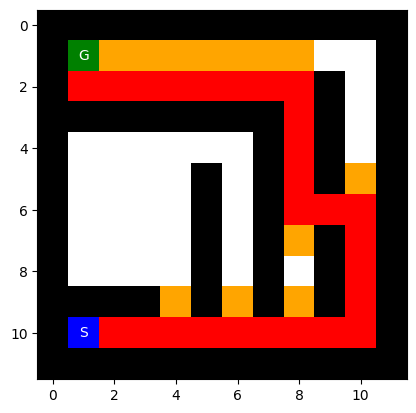

Path from start to goal:
(9, 2)
(9, 1)
(8, 1)
(8, 2)
(8, 3)
(8, 4)
(8, 5)
(8, 6)
(8, 7)
(8, 8)
(8, 9)
(8, 10)
(7, 10)
(7, 9)
(7, 8)
(6, 8)
(6, 9)
(6, 10)
(5, 10)
(5, 9)
(5, 8)
(4, 8)
(4, 9)
(4, 10)
(3, 10)
(3, 9)
(3, 8)
(3, 7)
(3, 6)
(3, 5)
(3, 4)
(3, 3)
(3, 2)
(3, 1)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
Cost: 42
state_size: 91


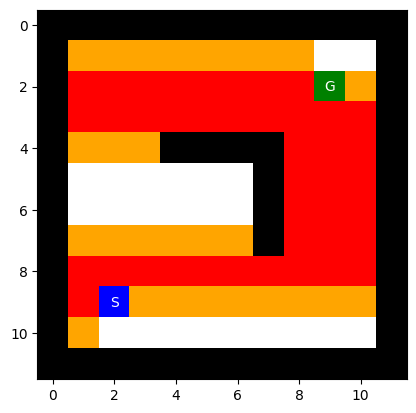

Path from start to goal:
(9, 2)
(9, 1)
(8, 1)
(8, 2)
(8, 3)
(8, 4)
(8, 5)
(8, 6)
(8, 7)
(8, 8)
(8, 9)
(8, 10)
(7, 10)
(7, 9)
(7, 8)
(7, 7)
(7, 6)
(7, 5)
(7, 4)
(7, 3)
(7, 2)
(7, 1)
(6, 1)
(6, 2)
(6, 3)
(6, 4)
(6, 5)
(6, 6)
(6, 7)
(6, 8)
(6, 9)
(6, 10)
(5, 10)
(5, 9)
(5, 8)
(5, 7)
(5, 6)
(5, 5)
(5, 4)
(5, 3)
(5, 2)
(5, 1)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(4, 10)
(3, 10)
(3, 9)
(3, 8)
(3, 7)
(3, 6)
(3, 5)
(3, 4)
(3, 3)
(3, 2)
(3, 1)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
Cost: 70
state_size: 145


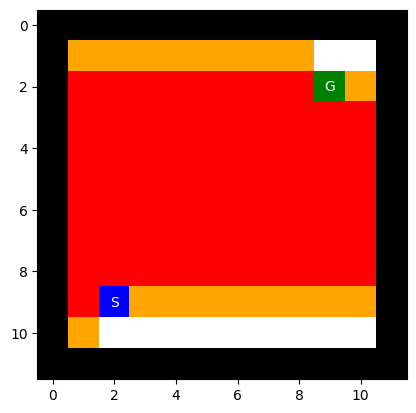

Path from start to goal:
(2, 9)
(2, 8)
(2, 7)
(2, 6)
(2, 5)
(2, 4)
(2, 3)
(2, 2)
(2, 1)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(2, 10)
(3, 10)
(3, 9)
(3, 8)
(3, 7)
(3, 6)
(3, 5)
(3, 4)
(3, 3)
(3, 2)
(3, 1)
(4, 1)
(4, 2)
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(4, 10)
(5, 10)
(5, 9)
(5, 8)
(5, 7)
(5, 6)
(5, 5)
(5, 4)
(5, 3)
(5, 2)
(5, 1)
(6, 1)
(6, 2)
(6, 3)
(6, 4)
(6, 5)
(6, 6)
(6, 7)
(6, 8)
(6, 9)
(6, 10)
(7, 10)
(7, 9)
(7, 8)
(7, 7)
(7, 6)
(7, 5)
(7, 4)
(7, 3)
(7, 2)
(7, 1)
(8, 1)
(8, 2)
(8, 3)
(8, 4)
(8, 5)
(8, 6)
(8, 7)
(8, 8)
(8, 9)
(8, 10)
(9, 10)
(9, 9)
(9, 8)
(9, 7)
(9, 6)
(9, 5)
(9, 4)
(9, 3)
(9, 2)
Cost: 88
state_size: 169


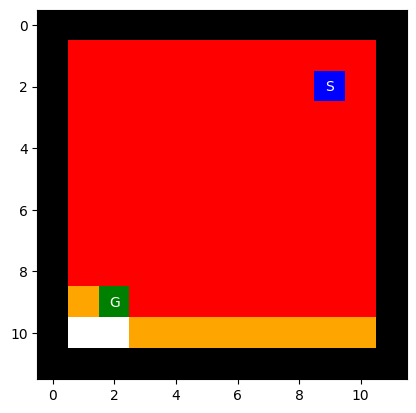

           Maze File Search_algorithm  Cost  Size of State Space Explored  \
0     small_maze.txt              BFS    19                            96   
1    medium_maze.txt              BFS    68                           278   
2     large_maze.txt              BFS   210                           623   
3     loops_maze.txt              BFS    23                           213   
4      wall_maze.txt              BFS    14                          1726   
5     empty_maze.txt              BFS    14                         22978   
6   empty_2_maze.txt              BFS    14                         22978   
7     small_maze.txt              DFS    49                            79   
8    medium_maze.txt              DFS   130                           155   
9     large_maze.txt              DFS   210                           462   
10    loops_maze.txt              DFS    27                            40   
11     wall_maze.txt              DFS    42                            91   

In [57]:
import pandas as pd
import maze_helper as mh


maze_files = ["small_maze.txt", "medium_maze.txt", "large_maze.txt", "loops_maze.txt", "wall_maze.txt", "empty_maze.txt", "empty_2_maze.txt"]


for maze_file in maze_files:
    # Read the maze file and parse it
    with open(maze_file, 'r') as f:
        maze_str = f.read()
        maze = mh.parse_maze(maze_str)

    # Finding the start and goal coordinates for the maze
    start_state = mh.find_pos(maze, what="S")
    goal_state = mh.find_pos(maze, what="G")

    root = Node(start_state, None, None, 0)

    # Call DFS to find the solution
    solution_node, s_size, max_Branching_Factor, optimal_depth, max_tree_depth = dfs(maze, start_state, goal_state, root, depth_limit=300)  # Adjust depth limit as needed

    if solution_node:
        path = solution_node.get_path_from_root()
        print("Path from start to goal:")
        for node in path:
            print(node.pos)
            if node.pos != start_state and node.pos != goal_state:
                maze[node.pos[0]][node.pos[1]] = "P"
        print("Cost:", solution_node.cost)
        print("state_size:", s_size)
    else:
        print("Goal not found")
    mh.show_maze(maze)

    # Append the results to the global data list
    data_whole.append([maze_file, "DFS", solution_node.cost, s_size, max_Branching_Factor, optimal_depth, max_tree_depth])

# Create a DataFrame from the data list
columns = ["Maze File", "Search_algorithm", "Cost", "Size of State Space Explored", "Maximum Branching Factor", "Optimal Depth", "Maximum Tree Depth"]
df_whole = pd.DataFrame(data_whole, columns=columns)

print(df_whole)


In [ ]:
#my open maze for dfs is not giving output, as it just start and entered inside the left room and then it keeps on running inside unable to come out of that room. Based on my understanding why it is not running and going on infinite loop becuase i think my agent is just banging on to the wall and trying to come out but unable to do that.

How does BFS and DFS deal with loops (cycles)?

In [ ]:
# In case of BFS, I used a explored data structure that track all the previous visited nodes and while running if it gets close to that node that already been visited, it skip that and do not add it to the frontier.

# In case of DFS, I am continuously cheecking my path from root till the last visted node and if the current node is already there in the path then it will skip it thats how DFS is dealing with loops.

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

In [ ]:
# DFS is not optimal, but the BFS implementation is both complete and optimal except in case of open loop maze. The BFS algorithm is visiting all of its nearby nodes first. However, the DFS goes into the depth of one node like all child nodes until reach dead end as it uses stack.

# The worst space is O(M*N),  M*N = size of the maze
# The time complexities are O(M*N)

# chance is there that might not reach to the goal or there might not be a goal.

## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides).

In [58]:
def near_neighbors(node, map_maze, goal):
    current_Position = node.pos
    neighbrs = []

    actions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    # Adding adjacent nodes (north, south, east, west) based on available actions
    for act in actions:
        new_pos = (current_Position[0]+act[0],current_Position[1]+act[1])

        if mh.look(map_maze,new_pos) != "X":
            neighbrs.append(Node(new_pos, node, act, node.cost + 1, goal=goal))

    return neighbrs


#GBFS
def greedy_best_first_search(maze,start,goal):
    # visited contains nodes already visited
    visited = set()
    # Priority queue is used
    frontier_PriorityQueue = PriorityQueue()

    start_state = Node(start,None, None, 0,goal=goal)


    frontier_PriorityQueue.put((start_state.distance,start_state))


    s_size= 1   #tree size
    max_tree_depth = 0
    max_Branching_Factor= 0
    max_frontier_size = frontier_PriorityQueue.qsize()


    while frontier_PriorityQueue:

        if max_frontier_size < frontier_PriorityQueue.qsize() :
            max_frontier_size = frontier_PriorityQueue.qsize()

        current_Node = frontier_PriorityQueue.get()[1]
        currentPosition = current_Node.pos

        if current_Node.cost > max_tree_depth :
          max_tree_depth = current_Node.cost


        if currentPosition == goal :
            optimal_depth = current_Node.cost
            return current_Node, s_size, max_Branching_Factor,optimal_depth, max_tree_depth

        visited.add(currentPosition)
        #for neighbors
        neighbors = near_neighbors(current_Node, maze, goal)
        branch_fact = 0
        for new in neighbors:
            branch_fact= 0
            new_pos = new.pos

            if new_pos not in visited:
                frontier_PriorityQueue.put((new.distance,new))

                if currentPosition !=start and currentPosition!=goal and new_pos != goal:
                    maze[new_pos[0]][new_pos[1]] = "F"
                    maze[currentPosition[0]][currentPosition[1]] = "."
                s_size+=1
                branch_fact+=1
                # Printing frame by frame for every step
            if branch_fact > max_Branching_Factor:
                max_Branching_Factor= branch_fact
        # mh.show_maze(maze)

    return None




Path from start to goal:
(3, 11)
(3, 10)
(3, 9)
(3, 8)
(3, 7)
(3, 6)
(4, 6)
(5, 6)
(6, 6)
(6, 7)
(6, 8)
(5, 8)
(5, 9)
(5, 10)
(5, 11)
(5, 12)
(6, 12)
(7, 12)
(7, 11)
(7, 10)
(8, 10)
(8, 9)
(8, 8)
(8, 7)
(8, 6)
(8, 5)
(8, 4)
(8, 3)
(8, 2)
(8, 1)
Cost: 29


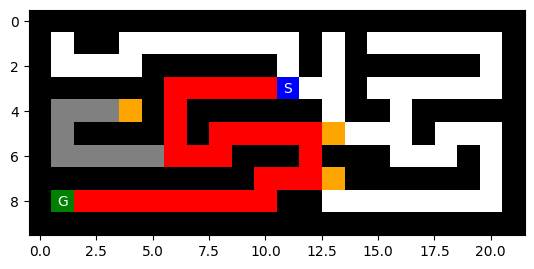

Path from start to goal:
(1, 34)
(2, 34)
(3, 34)
(3, 33)
(3, 32)
(3, 31)
(3, 30)
(4, 30)
(5, 30)
(5, 31)
(5, 32)
(5, 33)
(5, 34)
(6, 34)
(7, 34)
(7, 33)
(7, 32)
(7, 31)
(7, 30)
(8, 30)
(9, 30)
(9, 31)
(9, 32)
(9, 33)
(9, 34)
(10, 34)
(11, 34)
(11, 33)
(11, 32)
(11, 31)
(11, 30)
(12, 30)
(13, 30)
(13, 31)
(13, 32)
(13, 33)
(13, 34)
(14, 34)
(15, 34)
(16, 34)
(16, 33)
(16, 32)
(16, 31)
(16, 30)
(16, 29)
(16, 28)
(16, 27)
(15, 27)
(15, 26)
(15, 25)
(15, 24)
(15, 23)
(15, 22)
(15, 21)
(15, 20)
(15, 19)
(15, 18)
(15, 17)
(15, 16)
(15, 15)
(15, 14)
(15, 13)
(15, 12)
(15, 11)
(15, 10)
(16, 10)
(16, 9)
(16, 8)
(16, 7)
(16, 6)
(16, 5)
(16, 4)
(16, 3)
(16, 2)
(16, 1)
Cost: 74


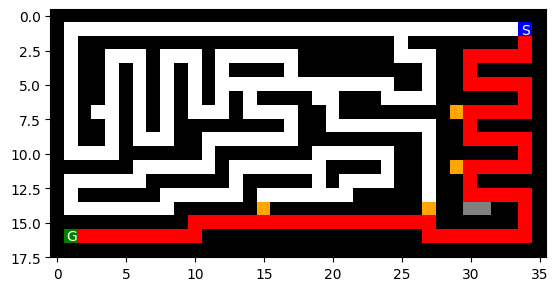

Path from start to goal:
(35, 35)
(34, 35)
(33, 35)
(33, 34)
(33, 33)
(33, 32)
(33, 31)
(32, 31)
(31, 31)
(31, 30)
(31, 29)
(32, 29)
(33, 29)
(33, 28)
(33, 27)
(33, 26)
(33, 25)
(33, 24)
(33, 23)
(33, 22)
(33, 21)
(33, 20)
(33, 19)
(33, 18)
(33, 17)
(33, 16)
(33, 15)
(32, 15)
(31, 15)
(31, 16)
(31, 17)
(30, 17)
(29, 17)
(29, 16)
(29, 15)
(28, 15)
(27, 15)
(26, 15)
(25, 15)
(24, 15)
(23, 15)
(23, 16)
(23, 17)
(23, 18)
(23, 19)
(23, 20)
(23, 21)
(24, 21)
(25, 21)
(25, 22)
(25, 23)
(24, 23)
(23, 23)
(23, 24)
(23, 25)
(23, 26)
(23, 27)
(22, 27)
(21, 27)
(21, 28)
(21, 29)
(22, 29)
(23, 29)
(23, 30)
(23, 31)
(22, 31)
(21, 31)
(20, 31)
(19, 31)
(18, 31)
(17, 31)
(17, 32)
(17, 33)
(17, 34)
(17, 35)
(16, 35)
(15, 35)
(14, 35)
(13, 35)
(12, 35)
(11, 35)
(10, 35)
(9, 35)
(8, 35)
(7, 35)
(7, 34)
(7, 33)
(8, 33)
(9, 33)
(9, 32)
(9, 31)
(9, 30)
(9, 29)
(10, 29)
(11, 29)
(12, 29)
(13, 29)
(14, 29)
(15, 29)
(15, 28)
(15, 27)
(16, 27)
(17, 27)
(18, 27)
(19, 27)
(19, 26)
(19, 25)
(18, 25)
(17, 25)
(17, 

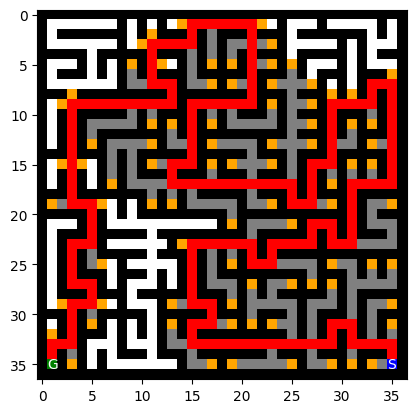

Path from start to goal:
(10, 1)
(10, 2)
(10, 3)
(10, 4)
(10, 5)
(10, 6)
(10, 7)
(10, 8)
(9, 8)
(8, 8)
(7, 8)
(6, 8)
(5, 8)
(4, 8)
(3, 8)
(2, 8)
(1, 8)
(1, 7)
(1, 6)
(1, 5)
(1, 4)
(1, 3)
(1, 2)
(1, 1)
Cost: 23


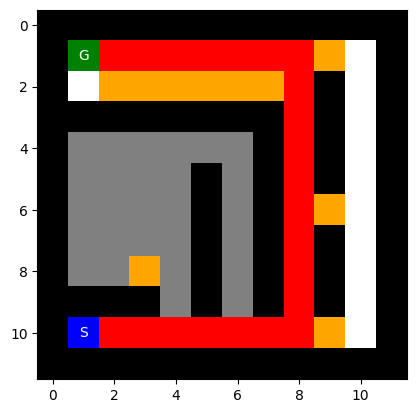

Path from start to goal:
(9, 2)
(8, 2)
(7, 2)
(6, 2)
(5, 2)
(4, 2)
(3, 2)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
Cost: 14


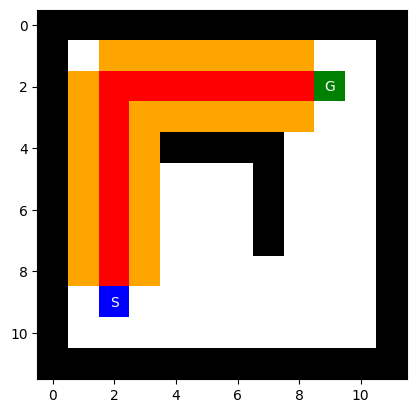

Path from start to goal:
(9, 2)
(8, 2)
(7, 2)
(6, 2)
(5, 2)
(4, 2)
(3, 2)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
Cost: 14


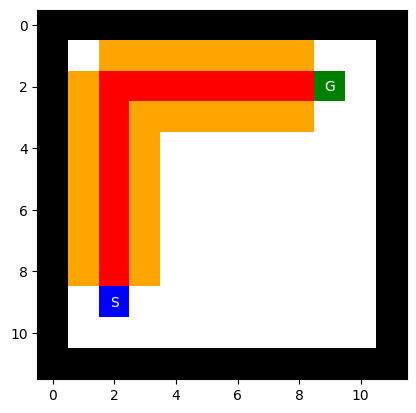

Path from start to goal:
(2, 9)
(3, 9)
(4, 9)
(5, 9)
(6, 9)
(7, 9)
(8, 9)
(9, 9)
(9, 8)
(9, 7)
(9, 6)
(9, 5)
(9, 4)
(9, 3)
(9, 2)
Cost: 14


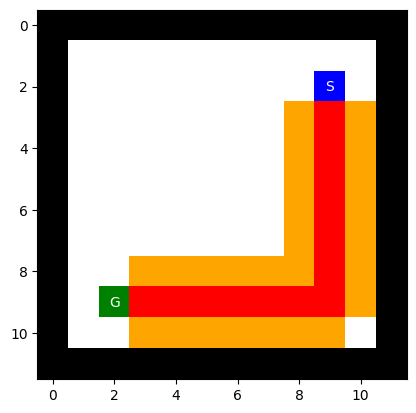

Path from start to goal:
(1, 35)
(2, 35)
(3, 35)
(4, 35)
(5, 35)
(6, 35)
(7, 35)
(8, 35)
(9, 35)
(10, 35)
(11, 35)
(12, 35)
(13, 35)
(13, 34)
(13, 33)
(13, 32)
(13, 31)
(13, 30)
(13, 29)
(13, 28)
(13, 27)
(13, 26)
(13, 25)
(13, 24)
(13, 23)
(13, 22)
(13, 21)
(12, 21)
(11, 21)
(10, 21)
(9, 21)
(8, 21)
(7, 21)
(6, 21)
(6, 20)
(6, 19)
(7, 19)
(8, 19)
(9, 19)
(10, 19)
(11, 19)
(12, 19)
(13, 19)
(14, 19)
(15, 19)
(16, 19)
(17, 19)
(18, 19)
(19, 19)
(20, 19)
(21, 19)
(21, 18)
(21, 17)
(21, 16)
(21, 15)
(21, 14)
(21, 13)
(21, 12)
(21, 11)
(21, 10)
(21, 9)
(21, 8)
(21, 7)
(21, 6)
(21, 5)
(21, 4)
(21, 3)
(21, 2)
(21, 1)
Cost: 68


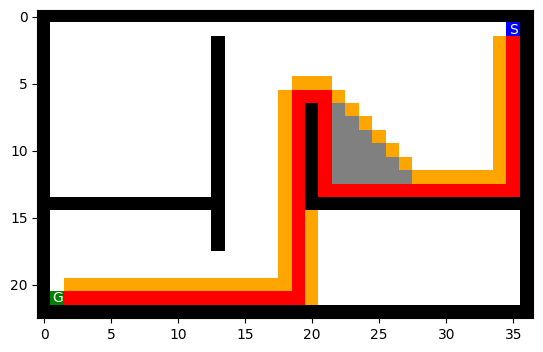

           Maze File Search_algorithm  Cost  Size of State Space Explored  \
0     small_maze.txt              BFS    19                            96   
1    medium_maze.txt              BFS    68                           278   
2     large_maze.txt              BFS   210                           623   
3     loops_maze.txt              BFS    23                           213   
4      wall_maze.txt              BFS    14                          1726   
5     empty_maze.txt              BFS    14                         22978   
6   empty_2_maze.txt              BFS    14                         22978   
7     small_maze.txt              DFS    49                            79   
8    medium_maze.txt              DFS   130                           155   
9     large_maze.txt              DFS   210                           462   
10    loops_maze.txt              DFS    27                            40   
11     wall_maze.txt              DFS    42                            91   

In [59]:

import maze_helper as mh
from queue import PriorityQueue

maze_files = ["small_maze.txt", "medium_maze.txt", "large_maze.txt", "loops_maze.txt", "wall_maze.txt", "empty_maze.txt", "empty_2_maze.txt", "open_maze.txt"]


for maze_file in maze_files:
    # Read the maze file and parse it
    with open(maze_file, 'r') as f:
        maze_str = f.read()
        maze = mh.parse_maze(maze_str)

    # Finding the start and goal coordinates for the maze
    start_state = mh.find_pos(maze, what="S")
    goal_state = mh.find_pos(maze, what="G")


    actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]


    # root = Node(start_state, None, None, 0)
    solution_node,s_size, max_Branching_Factor, optimal_depth, max_tree_depth = greedy_best_first_search(maze,start_state,goal_state)

    if solution_node:
        path = solution_node.get_path_from_root()
        print("Path from start to goal:")
        for node in path:
            print(node.pos)
            if node.pos != start_state and node.pos != goal_state:
                maze[node.pos[0]][node.pos[1]] = "P"
        print("Cost:", solution_node.cost)
    else:
        print("Goal not found")
    mh.show_maze(maze)

#     #Append the results to the global data list
    data_whole.append([maze_file, "GBFS", solution_node.cost, s_size, max_Branching_Factor, optimal_depth, max_tree_depth])

# Create a DataFrame from the data list
columns = ["Maze File", "Search_algorithm", "Cost", "Size of State Space Explored", "Maximum Branching Factor", "Optimal Depth", "Maximum Tree Depth"]
df_whole = pd.DataFrame(data_whole, columns=columns)

print(df_whole)




In [41]:
#ASTAR

def near_neighbors(node, Board, goal):
    current_Position = node.pos
    neighbrs = []

    actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    for act in actions:
        new_pos = (current_Position[0]+act[0],current_Position[1]+act[1])

        if mh.look(Board,new_pos) != "X":
            neighbrs.append(Node(new_pos, node, act, node.cost + 1, goal=goal))

    return neighbrs


def ASTAR(maze,start,goal):

    visited = set()

    frontier_PriorityQueue = PriorityQueue()

    start_state = Node(start,None, None, 0,goal=goal)


    frontier_PriorityQueue.put((start_state.distance,start_state))

    s_size= 1   #tree size
    max_tree_depth = 0
    max_Branching_Factor= 0
    max_frontier_size = frontier_PriorityQueue.qsize()

    # while the priority queue is not empty, that is, the goal is not reached the loop will keep on running.
    while frontier_PriorityQueue:

        if frontier_PriorityQueue.qsize() > max_frontier_size :
            max_frontier_size = frontier_PriorityQueue.qsize()

        current_Node = frontier_PriorityQueue.get()[1]
        currentPosition = current_Node.pos

        if current_Node.cost > max_tree_depth :
          max_tree_depth = current_Node.cost

        #  the goal is reached
        if currentPosition == goal :
            optimal_depth = current_Node.cost
            return current_Node, s_size, max_Branching_Factor,optimal_depth, max_tree_depth

        visited.add(currentPosition)

        neighbors = near_neighbors(current_Node, maze, goal)
        branch_fact = 0
        for new in neighbors:
            new_pos = new.pos

            if new_pos not in visited:
                frontier_PriorityQueue.put((new.distance + new.cost,new))

                if currentPosition !=start and currentPosition!=goal and new_pos != goal:
                    maze[new_pos[0]][new_pos[1]] = "F"
                    maze[currentPosition[0]][currentPosition[1]] = "."
                s_size+=1
                branch_fact+=1

            if branch_fact > max_Branching_Factor:
                max_Branching_Factor = branch_fact
        # mh.show_maze(maze)

    return None





Path from start to goal:
(3, 11)
(3, 12)
(3, 13)
(4, 13)
(5, 13)
(5, 12)
(6, 12)
(7, 12)
(7, 11)
(7, 10)
(8, 10)
(8, 9)
(8, 8)
(8, 7)
(8, 6)
(8, 5)
(8, 4)
(8, 3)
(8, 2)
(8, 1)
Cost: 19


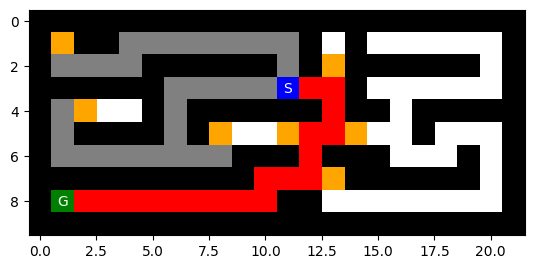

Path from start to goal:
(1, 34)
(1, 33)
(1, 32)
(1, 31)
(1, 30)
(1, 29)
(1, 28)
(1, 27)
(1, 26)
(1, 25)
(2, 25)
(3, 25)
(3, 26)
(3, 27)
(4, 27)
(5, 27)
(6, 27)
(6, 26)
(6, 25)
(6, 24)
(5, 24)
(5, 23)
(5, 22)
(5, 21)
(5, 20)
(6, 20)
(7, 20)
(8, 20)
(8, 21)
(8, 22)
(8, 23)
(8, 24)
(8, 25)
(8, 26)
(8, 27)
(9, 27)
(10, 27)
(11, 27)
(12, 27)
(13, 27)
(14, 27)
(15, 27)
(15, 26)
(15, 25)
(15, 24)
(15, 23)
(15, 22)
(15, 21)
(15, 20)
(15, 19)
(15, 18)
(15, 17)
(15, 16)
(15, 15)
(15, 14)
(15, 13)
(15, 12)
(15, 11)
(15, 10)
(16, 10)
(16, 9)
(16, 8)
(16, 7)
(16, 6)
(16, 5)
(16, 4)
(16, 3)
(16, 2)
(16, 1)
Cost: 68


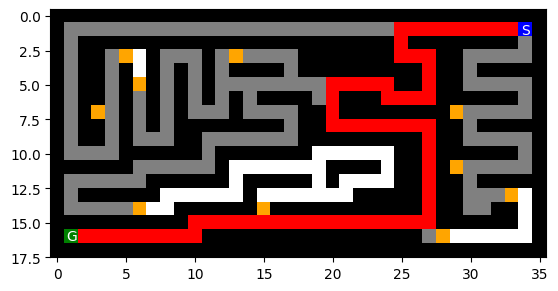

Path from start to goal:
(35, 35)
(34, 35)
(33, 35)
(33, 34)
(33, 33)
(33, 32)
(33, 31)
(32, 31)
(31, 31)
(31, 30)
(31, 29)
(32, 29)
(33, 29)
(33, 28)
(33, 27)
(33, 26)
(33, 25)
(33, 24)
(33, 23)
(33, 22)
(33, 21)
(33, 20)
(33, 19)
(33, 18)
(33, 17)
(33, 16)
(33, 15)
(32, 15)
(31, 15)
(31, 16)
(31, 17)
(30, 17)
(29, 17)
(29, 16)
(29, 15)
(28, 15)
(27, 15)
(26, 15)
(25, 15)
(24, 15)
(23, 15)
(23, 16)
(23, 17)
(23, 18)
(23, 19)
(23, 20)
(23, 21)
(24, 21)
(25, 21)
(25, 22)
(25, 23)
(24, 23)
(23, 23)
(23, 24)
(23, 25)
(23, 26)
(23, 27)
(22, 27)
(21, 27)
(21, 28)
(21, 29)
(22, 29)
(23, 29)
(23, 30)
(23, 31)
(22, 31)
(21, 31)
(20, 31)
(19, 31)
(18, 31)
(17, 31)
(17, 32)
(17, 33)
(17, 34)
(17, 35)
(16, 35)
(15, 35)
(14, 35)
(13, 35)
(12, 35)
(11, 35)
(10, 35)
(9, 35)
(8, 35)
(7, 35)
(7, 34)
(7, 33)
(8, 33)
(9, 33)
(9, 32)
(9, 31)
(9, 30)
(9, 29)
(10, 29)
(11, 29)
(12, 29)
(13, 29)
(14, 29)
(15, 29)
(15, 28)
(15, 27)
(16, 27)
(17, 27)
(18, 27)
(19, 27)
(19, 26)
(19, 25)
(18, 25)
(17, 25)
(17, 

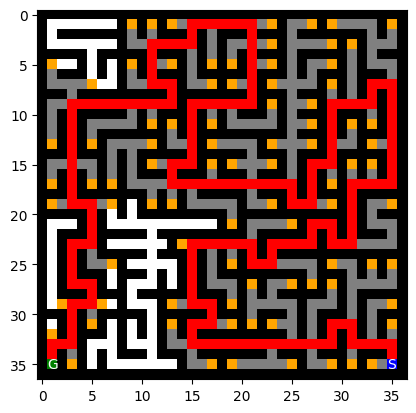

Path from start to goal:
(10, 1)
(10, 2)
(10, 3)
(10, 4)
(10, 5)
(10, 6)
(10, 7)
(10, 8)
(9, 8)
(8, 8)
(7, 8)
(6, 8)
(5, 8)
(4, 8)
(3, 8)
(2, 8)
(1, 8)
(1, 7)
(1, 6)
(1, 5)
(1, 4)
(1, 3)
(1, 2)
(1, 1)
Cost: 23


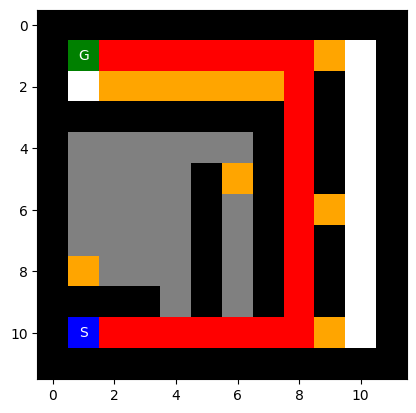

Path from start to goal:
(9, 2)
(8, 2)
(7, 2)
(6, 2)
(5, 2)
(4, 2)
(3, 2)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
Cost: 14


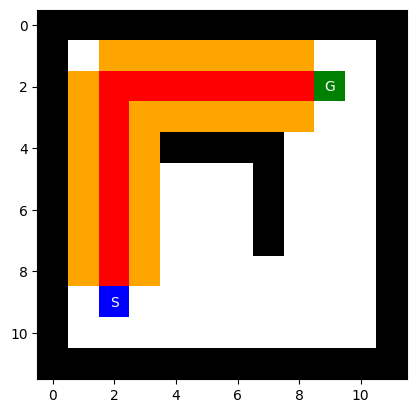

Path from start to goal:
(9, 2)
(8, 2)
(7, 2)
(6, 2)
(5, 2)
(4, 2)
(3, 2)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
Cost: 14


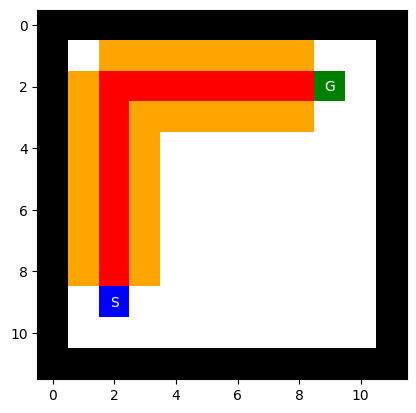

Path from start to goal:
(2, 9)
(3, 9)
(4, 9)
(5, 9)
(6, 9)
(7, 9)
(8, 9)
(9, 9)
(9, 8)
(9, 7)
(9, 6)
(9, 5)
(9, 4)
(9, 3)
(9, 2)
Cost: 14


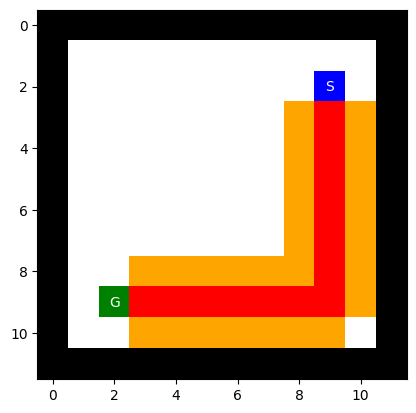

Path from start to goal:
(1, 35)
(2, 35)
(3, 35)
(4, 35)
(5, 35)
(6, 35)
(6, 34)
(6, 33)
(6, 32)
(6, 31)
(6, 30)
(6, 29)
(6, 28)
(6, 27)
(6, 26)
(6, 25)
(6, 24)
(6, 23)
(6, 22)
(6, 21)
(6, 20)
(6, 19)
(7, 19)
(8, 19)
(9, 19)
(10, 19)
(11, 19)
(12, 19)
(13, 19)
(14, 19)
(15, 19)
(16, 19)
(17, 19)
(18, 19)
(19, 19)
(20, 19)
(21, 19)
(21, 18)
(21, 17)
(21, 16)
(21, 15)
(21, 14)
(21, 13)
(21, 12)
(21, 11)
(21, 10)
(21, 9)
(21, 8)
(21, 7)
(21, 6)
(21, 5)
(21, 4)
(21, 3)
(21, 2)
(21, 1)
Cost: 54


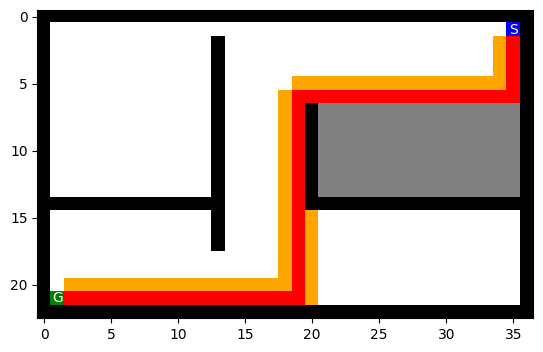

           Maze File Search_algorithm  Cost  Size of State Space Explored  \
0     small_maze.txt              BFS    19                            96   
1    medium_maze.txt              BFS    68                           278   
2     large_maze.txt              BFS   210                           623   
3     loops_maze.txt              BFS    23                           213   
4      wall_maze.txt              BFS    14                          1726   
5     empty_maze.txt              BFS    14                         22978   
6   empty_2_maze.txt              BFS    14                         22978   
7     small_maze.txt              DFS    49                            79   
8    medium_maze.txt              DFS   130                           155   
9     large_maze.txt              DFS   210                           462   
10    loops_maze.txt              DFS    27                            40   
11     wall_maze.txt              DFS    42                            91   

In [60]:

import maze_helper as mh
from queue import PriorityQueue


maze_files = ["small_maze.txt", "medium_maze.txt", "large_maze.txt", "loops_maze.txt", "wall_maze.txt", "empty_maze.txt", "empty_2_maze.txt", "open_maze.txt"]


for maze_file in maze_files:
    # Read the maze file and parse it
    with open(maze_file, 'r') as f:
        maze_str = f.read()
        maze = mh.parse_maze(maze_str)

    # Finding the start and goal coordinates for the maze
    start_state = mh.find_pos(maze, what="S")
    goal_state = mh.find_pos(maze, what="G")


    actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]


    # root = Node(start_state, None, None, 0)

    solution_node, s_size, max_Branching_Factor,optimal_depth, max_tree_depth = ASTAR(maze,start_state,goal_state)

    if solution_node:
        path = solution_node.get_path_from_root()
        print("Path from start to goal:")
        for node in path:
            print(node.pos)
            if node.pos != start_state and node.pos != goal_state:
                maze[node.pos[0]][node.pos[1]] = "P"
        print("Cost:", solution_node.cost)
    else:
        print("Goal not found")
    mh.show_maze(maze)

    data_whole.append([maze_file, "ASTAR", solution_node.cost, s_size, max_Branching_Factor, optimal_depth, max_tree_depth])

# # Create a DataFrame from the data list
columns = ["Maze File", "Search_algorithm", "Cost", "Size of State Space Explored", "Maximum Branching Factor", "Optimal Depth", "Maximum Tree Depth"]
df_whole = pd.DataFrame(data_whole, columns=columns)

print(df_whole)





Are your implementations complete and optimal? What is the time and space complexity?

In [47]:
A-star is complete and optimal whereas the greedy best first search is complete but not optimal.
In The worst case scenario for space will be O(N) and time complexity will be O(N) as it calculates which nodes to neighbour or which node to visit and then add it to visit.

In [61]:
df_whole

,Maze File,Search_algorithm,Cost,Size of State Space Explored,Maximum Branching Factor,Optimal Depth,Maximum Tree Depth
0,small_maze.txt,BFS,19,96,3,19,19
1,medium_maze.txt,BFS,68,278,2,68,68
2,large_maze.txt,BFS,210,623,3,210,210
3,loops_maze.txt,BFS,23,213,2,23,23
4,wall_maze.txt,BFS,14,1726,4,14,14
5,empty_maze.txt,BFS,14,22978,4,14,14
6,empty_2_maze.txt,BFS,14,22978,4,14,14
7,small_maze.txt,DFS,49,79,3,49,49
8,medium_maze.txt,DFS,130,155,2,130,130
9,large_maze.txt,DFS,210,462,3,210,222


## Task 4: Comparison and discussion [20 Points]

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

Present the results as using charts (see [Python Code Examples/charts and tables](../HOWTOs/charts_and_tables.ipynb)).

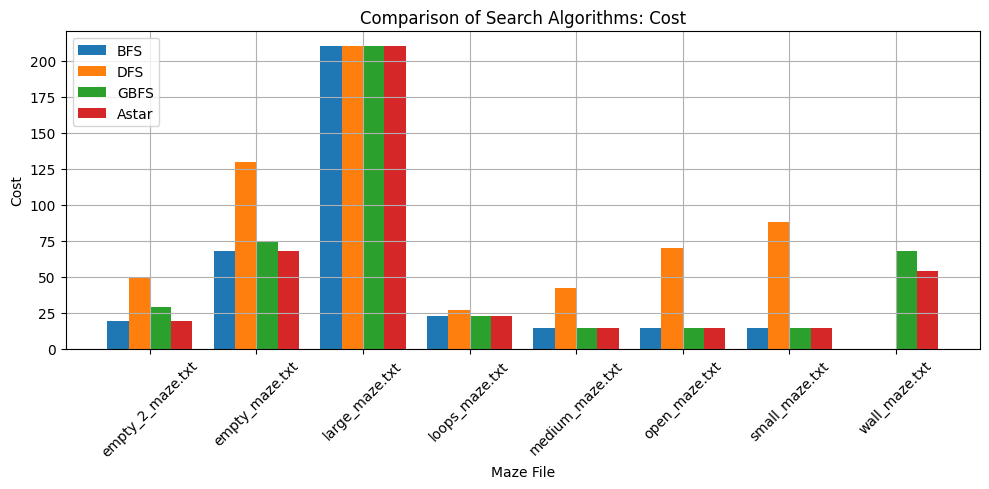

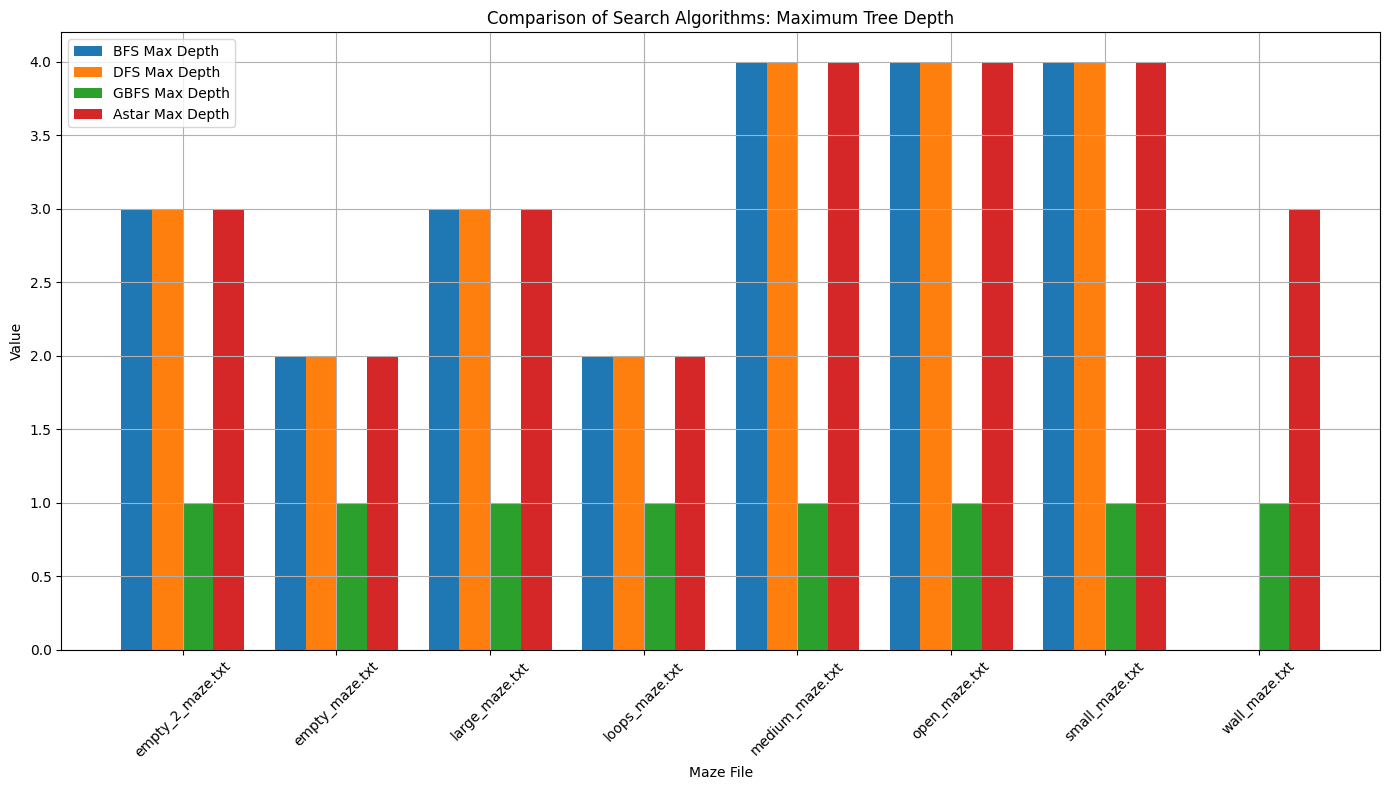

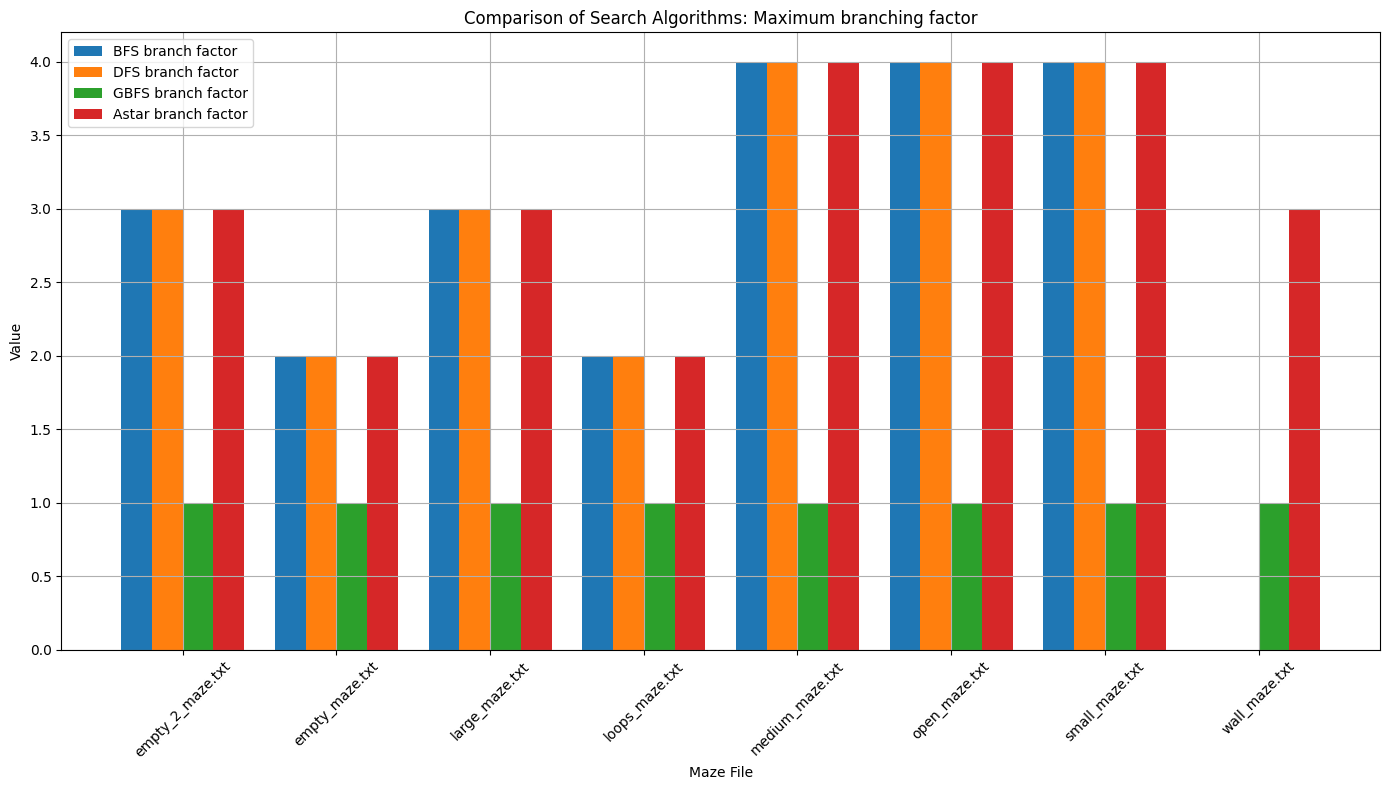

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Filter data based on search algorithms
bfs_data = df_whole[df_whole['Search_algorithm'] == 'BFS']
dfs_data = df_whole[df_whole['Search_algorithm'] == 'DFS']
gbfs_data = df_whole[df_whole['Search_algorithm'] == 'GBFS']
astar_data = df_whole[df_whole['Search_algorithm'] == 'ASTAR']

# Define x-axis values (maze files)
maze_files = np.unique(df_whole['Maze File'])

# Get data for each algorithm
bfs_cost = bfs_data['Cost'].tolist() + [np.nan] * (len(maze_files) - len(bfs_data))
dfs_cost = dfs_data['Cost'].tolist() + [np.nan] * (len(maze_files) - len(dfs_data))
gbfs_cost = gbfs_data['Cost'].tolist() + [np.nan] * (len(maze_files) - len(gbfs_data))
astar_cost = astar_data['Cost'].tolist() + [np.nan] * (len(maze_files) - len(astar_data))


# Plotting costs
plt.figure(figsize=(10, 5))
bar_width = 0.2
index = np.arange(len(maze_files))
plt.bar(index - 1.5 * bar_width, bfs_cost, bar_width, label='BFS')
plt.bar(index - 0.5 * bar_width, dfs_cost, bar_width, label='DFS')
plt.bar(index + 0.5 * bar_width, gbfs_cost, bar_width, label='GBFS')
plt.bar(index + 1.5 * bar_width, astar_cost, bar_width, label='Astar')
plt.xlabel('Maze File')
plt.ylabel('Cost')
plt.title('Comparison of Search Algorithms: Cost')
plt.xticks(index, maze_files, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


bfs_max_depth = bfs_data['Maximum Tree Depth'].tolist() + [np.nan] * (len(maze_files) - len(bfs_data))
dfs_max_depth = dfs_data['Maximum Tree Depth'].tolist() + [np.nan] * (len(maze_files) - len(dfs_data))
gbfs_max_depth = gbfs_data['Maximum Tree Depth'].tolist() + [np.nan] * (len(maze_files) - len(gbfs_data))
astar_max_depth = astar_data['Maximum Tree Depth'].tolist() + [np.nan] * (len(maze_files) - len(astar_data))


bfs_max_depth = bfs_data['Maximum Branching Factor'].tolist() + [np.nan] * (len(maze_files) - len(bfs_data))
dfs_max_depth = dfs_data['Maximum Branching Factor'].tolist() + [np.nan] * (len(maze_files) - len(dfs_data))
gbfs_max_depth = gbfs_data['Maximum Branching Factor'].tolist() + [np.nan] * (len(maze_files) - len(gbfs_data))
astar_max_depth = astar_data['Maximum Branching Factor'].tolist() + [np.nan] * (len(maze_files) - len(astar_data))



plt.figure(figsize=(14, 8))
bar_width = 0.2
index = np.arange(len(maze_files))
plt.bar(index - 1.5 * bar_width, bfs_max_depth, bar_width, label='BFS Max Depth')
plt.bar(index - 0.5 * bar_width, dfs_max_depth, bar_width, label='DFS Max Depth')
plt.bar(index + 0.5 * bar_width, gbfs_max_depth, bar_width, label='GBFS Max Depth')
plt.bar(index + 1.5 * bar_width, astar_max_depth, bar_width, label='Astar Max Depth')
plt.xlabel('Maze File')
plt.ylabel('Value')
plt.title('Comparison of Search Algorithms: Maximum Tree Depth')
plt.xticks(index, maze_files, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 8))
bar_width = 0.2
index = np.arange(len(maze_files))
plt.bar(index - 1.5 * bar_width, bfs_max_depth, bar_width, label='BFS branch factor')
plt.bar(index - 0.5 * bar_width, dfs_max_depth, bar_width, label='DFS branch factor')
plt.bar(index + 0.5 * bar_width, gbfs_max_depth, bar_width, label='GBFS branch factor')
plt.bar(index + 1.5 * bar_width, astar_max_depth, bar_width, label='Astar branch factor')
plt.xlabel('Maze File')
plt.ylabel('Value')
plt.title('Comparison of Search Algorithms: Maximum branching factor')
plt.xticks(index, maze_files, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




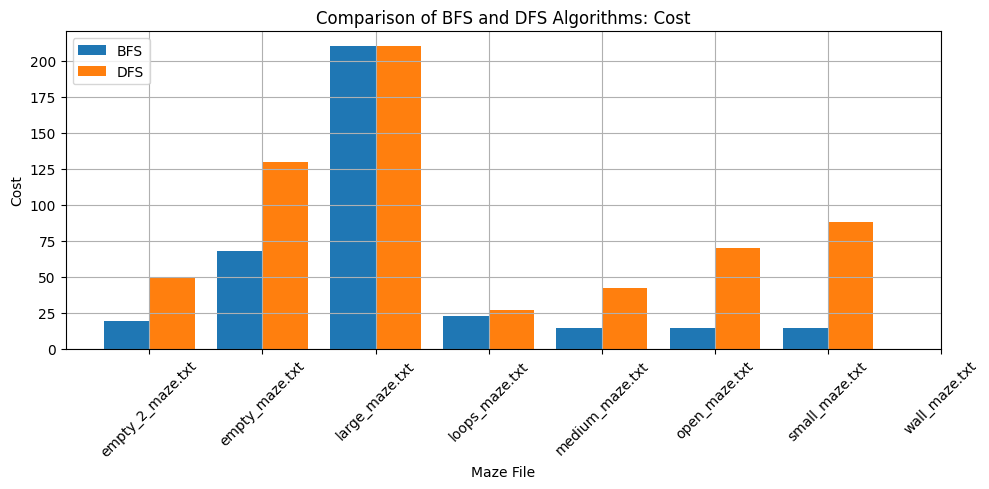

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Filter data for BFS and DFS algorithms
bfs_data = df_whole[df_whole['Search_algorithm'] == 'BFS']
dfs_data = df_whole[df_whole['Search_algorithm'] == 'DFS']

# Define x-axis values (maze files)
maze_files = np.unique(df_whole['Maze File'])

# Get data for BFS
bfs_cost = bfs_data['Cost'].tolist() + [np.nan] * (len(maze_files) - len(bfs_data))


# Get data for DFS
dfs_cost = dfs_data['Cost'].tolist() + [np.nan] * (len(maze_files) - len(dfs_data))

# Plotting costs
plt.figure(figsize=(10, 5))
bar_width = 0.4
index = np.arange(len(maze_files))
plt.bar(index - bar_width/2, bfs_cost, bar_width, label='BFS')
plt.bar(index + bar_width/2, dfs_cost, bar_width, label='DFS')
plt.xlabel('Maze File')
plt.ylabel('Cost')
plt.title('Comparison of BFS and DFS Algorithms: Cost')
plt.xticks(index, maze_files, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()






Discuss the most important lessons you have learned from implementing the different search strategies.

In [ ]:
From implementing different search strategies, I got to learn about different search algorithms, I got to know dfs is not optimal search algorithm, got to know about time complexities, Heuristic Functions,EventCollection
Among these search algorithm, I saw ASTAR is the best algorithm amobe all in case of cost. I learnt about debugging and also abou the implementation of algorithms for different environments.

In [ ]:
#References used for understanding

#https://www.youtube.com/watch?v=QRq6p9s8NVg
#geeksforgeeks
#stackoverflow

## Advanced task: IDS and Multiple goals

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Implement IDS (iterative deepening search using DFS)

2. Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and IDS. Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

In [8]:
1.
#for IDS i MODIFIED the function to gradually increase the depth limit until the goal state is found or until the search is exhausted.We run the DFS function repeatedly with progressively greater depth limitations until a solution is found or the search space is exhausted. We begin with a depth limit of 0.
#I will raise the depth limit and carry on the search if the DFS function returns "cutoff," which indicates that the depth limit was reached without a solution.

def iterative_deepening_search(maze, start, goal, root):
    depth_limit = 0
    while True:
        end_result = dfs(maze, start, goal, root, depth_limit)
        if end_result == 'cutoff':
            depth_limit += 1
        else:
            return end_result


#2. I have added image and added two other goals in the maze.
# with open(f"grade_image.txt", "r") as f:
#     maze_str = f.read()
# print(maze_str)

#implementing BFS on new image with mutliple goals


maze_files = ["grade_image.txt"]


for maze_file in maze_files:
    # Read the maze file and parse it
    with open(maze_file, 'r') as f:
        maze_str = f.read()
        maze = mh.parse_maze(maze_str)

    # Finding the start and goal coordinates for the maze
    start_state = mh.find_pos(maze, what="S")
    goal_states = mh.find_all_pos(maze, what="G")

    root = Node(start_state, None, None, 0)
    all_ans = []
    for goal in goal_states:
        solution_node, s_size, max_Branching_Factor, optimal_depth, max_tree_depth = bfs(maze, start_state, goal_state, root)
        all_ans.append((solution_node, s_size))

    if solution_node:
        path = solution_node.get_path_from_root()
        print("Path from start to goal:")
        for node in path:
            print(node.pos)
            if node.pos != start_state and node.pos != goal_state:
                maze[node.pos[0]][node.pos[1]] = "P"
        print("Cost:", solution_node.cost)
    else:
        print("Goal not found")


#Similarly I will do for DFS, in dfs without visted data structure

def dfs(maze, start, goal, root, depth_limit):
    frontier_stack = [root]

    s_size = 1
    max_Branching_Factor = 0
    max_tree_depth = 0
    max_frontier_size = len(frontier_stack)

    while frontier_stack:
        if len(frontier_stack) > max_frontier_size:
            max_frontier_size = len(frontier_stack)

        current_node = frontier_stack.pop()
        current_position = current_node.pos
        cost = current_node.cost

        if cost > max_tree_depth:
            max_tree_depth = cost

        if current_position == goal:
            optimal_depth = current_node.cost
            return current_node, s_size, max_Branching_Factor,optimal_depth, max_tree_depth   # Only return the solution node


        actions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
        branch_fact = 0
        if cost < depth_limit:  # Apply depth limit
            for act in actions:
                new_pos = (current_position[0] + act[0], current_position[1] + act[1])

                # Checking the new position is valid or not and not forming a cycle
                if mh.look(maze, new_pos) != "X" and not any(node.pos == new_pos for node in current_node.get_path_from_root()):
                    child_node = Node(new_pos, current_node, act, current_node.cost + 1)
                    if current_position != start and current_position != all_goal and child_node.pos != all_goal:
                        maze[new_pos[0]][new_pos[1]] = "F"
                        maze[current_position[0]][current_position[1]] = "."
                    s_size += 1
                    branch_fact+=1
                    frontier_stack.append(child_node)

                    if branch_fact > max_Branching_Factor:
                      max_Branching_Factor = branch_fact

    return None


#DFS is not giving the optimal solution as it gets stuck while bfs is giving for multiple goals.

## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [ ]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [ ]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [ ]:
# Your code/answer goes here